<a href="https://colab.research.google.com/github/Nardos-Amakele/QuantumTraining/blob/main/Quantum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 79.6 MB/s eta 0:00:00


Task 1: Forced Superposition
Create a circuit with 2 qubits where

Qubit 0 is in state |+⟩ (superposition of |0⟩ and |1⟩).

Qubit 1 is in state |1⟩.

Entangle them so that measuring Qubit 0 always gives the opposite result of Qubit 1.

Verify with 1000 shots and plot the counts.

Hint: Use H, CX, and X gates.



---



TASK 1: FORCED SUPERPOSITION
Goal: Create none correlated measurements using entanglement

Idea:
1. Qubit 0 starts in |+⟩ using the H-gate (superposition of |0⟩ and |1⟩)
2. Qubit 1 starts in |1⟩ using the X-gate
3. Implement entanglment using the CX(control=0, target=1)
   - This  will make sure the results are always oposite
   
Result:
- The result should be '01' and '10'.
- Should never show '00' or '11'. This would mean the entanglment has failed.


In [5]:
import qiskit
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import SamplerV2

# Create the Circuit with 2 qubits
# Then create qubit 0 and 1 with states in |+⟩ and |1⟩ respectively
# Entangled the qubits
# Visualaize the circuit
circ = qiskit.QuantumCircuit(2)
circ.h(0)
circ.x(1)
circ.cx(0, 1)
circ.measure_all()
circ.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        ├───┤┌─┴─┐ ░ └╥┘┌─┐
   q_1: ┤ X ├┤ X ├─░──╫─┤M├
        └───┘└───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

Counts(ideal): {'10': 476, '01': 524}


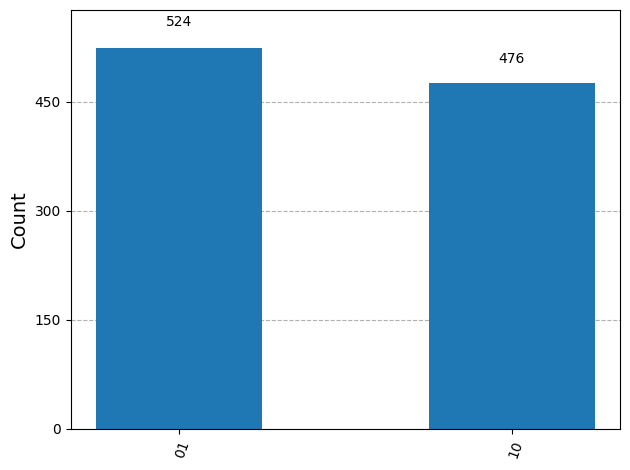

In [6]:
import matplotlib.pyplot as plt
sampler = SamplerV2()
job = sampler.run([circ], shots=1000)
# Get the result and visualize them verifying with 1000 shots as per the task.

result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()
print('Counts(ideal):', counts_ideal)
plot_histogram(counts_ideal)

Task 2: Entanglement Witness
Build a circuit to test if two qubits are entangled:

Prepare a Bell state (|00⟩ + |11⟩)/√2.

Add a probabilistic error: With 20% chance, apply an X gate to one qubit.

Measure just one qubit 1000 times. Is the output random (50/50)? If not, the qubits are no longer entangled.

Goal: Show that entanglement breaks if you modify one qubit.



---


TASK 1:  ENTANGLEMENT WITNESS
Goal: Create linked qubits (Bell state) using H + CX gates and add a 20% chance to break the link (with an X gate).

Idea:
1. Linked (entangled): Measurements random (50% 0, 50% 1).
2. Broken (error): not 50/50.
   
Result:
- ({'11': 489, '00': 511}).
- Still linked! (Perfect 50/50 split). No error.



In [4]:
import qiskit
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import SamplerV2

# Create a Quantum Circuit with 2 qubits
# Preparing a Bell state and applying X gate with 20% probability
circ = qiskit.QuantumCircuit(2)

circ.h(0)
circ.cx(0, 1)
if np.random.rand() < 0.2:
    circ.x(0)

circ.measure_all()
circ.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

Counts(ideal): {'11': 489, '00': 511}


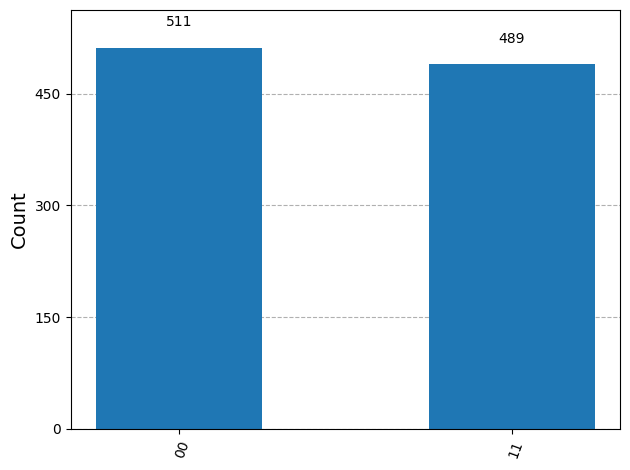

In [5]:
sampler = SamplerV2()
job = sampler.run([circ], shots=1000)

# Get the result and visualize
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()

print('Counts(ideal):', counts_ideal)
plot_histogram(counts_ideal)

Task 3: Opposite-Measurement Entanglement
Goal: Create a circuit where two qubits are entangled such that measuring one always gives the opposite result of the other (e.g., if Qubit 0 is 0, Qubit 1 must be 1, and vice versa).

Expected Output

After 1000 shots, the histogram should show only 01 and 10 (never 00 or 11).



---


TASK 3: OPPOSITE-MEASUREMENT VALIDATION

Goal: Verify perfect anti-correlation

Idea:
1. Similar to task 1:
   - CX(1,0) creates opposite states
2. Measurement certainty:
   - P(00) = P(11) = 0 (proof of entanglement)
   - P(01) = P(10) = 0.5

Result:
- No 00/11 outcomes are expected
- 00/11 results show implementation error


Counts(ideal): {'10': 499, '01': 501}


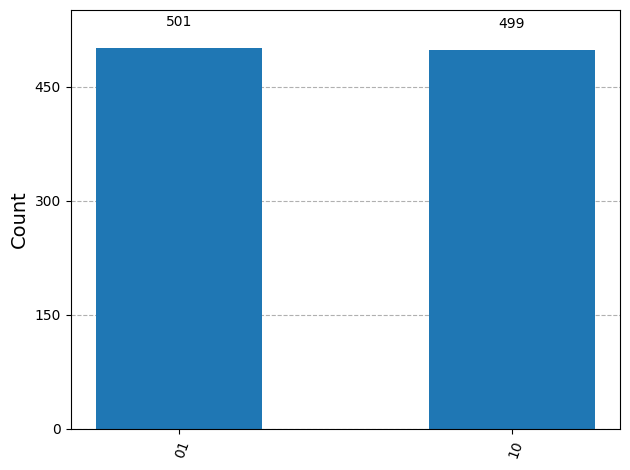

In [10]:
import qiskit
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import SamplerV2
import matplotlib.pyplot as plt
# Create the Circuit with 2 qubits
# Then create qubit 0 and 1 with states in |+⟩ and |1⟩ respectively
# Entangled the qubits
# Visualaize the circuit

circ = qiskit.QuantumCircuit(2)
circ.h(0)
circ.x(1)
circ.cx(0, 1)
circ.measure_all()
circ.draw()

sampler = SamplerV2()
job = sampler.run([circ], shots=1000)
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()
print('Counts(ideal):', counts_ideal)
plot_histogram(counts_ideal)

Task 4: Quantum Coin Flip Game
Simulate a game where:

Alice prepares a qubit in |+⟩ and sends it to Bob.

Bob randomly chooses to measure it in the X-basis (|+⟩/|-⟩) or Z-basis (|0⟩/|1⟩).

If Bob measures |+⟩ or |0⟩, he wins; else, Alice wins.

Run 500 trials and calculate the win rates.

Twist: Let Bob entangle his measurement choice with another qubit. Does this change the odds?



---


TASK 4: QUANTUM COIN FLIP SIMULATION

Goal: Demonstrate basis-choice dependence in measurements

Idea:
1. Alice prepares |+⟩ = (|0⟩ + |1⟩)/√2
2. Bob's choice affects outcomes:
   - X-basis measurement (H-gate): Wins on |+⟩ (always)
   - Z-basis measurement: 50% win chance
3. Twist:
   - Bob's choice qubit entangles with measurement qubit
   - Creates quantum correlation between choice and outcome

Result:
- Without entanglement: ~75% Bob win rate
- With entanglement: Altered probabilities (quantum advantage)


In [8]:
import qiskit
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import SamplerV2
import matplotlib.pyplot as plt
import random

# Create a Quantum Circuit with 2 qubits
# Alice has a qubit in |+⟩ state
# Bob randomly chooses to measure in X-basis or Z-basis
# Visualize

circ = qiskit.QuantumCircuit(2)
circ.h(0)

if random.choice(['X', 'Z']) == 'X':
    circ.h(0)
circ.measure_all()
circ.draw()
sampler = SamplerV2()
job = sampler.run([circ], shots=500)
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()

print('Counts(ideal):', counts_ideal)
plot_histogram(counts_ideal)
plt.show()

# Calculate win rates based on measurement basis and outcome
bob_wins = counts_ideal.get('00', 0)  # Count when Bob measures 0
alice_wins = counts_ideal.get('01', 0) + counts_ideal.get('10', 0) + counts_ideal.get('11', 0)
print(f"Bob's win : {bob_wins / 500 * 100:.2f}%")
print(f"Alice's win : {alice_wins / 500 * 100:.2f}%")

Counts(ideal): {'00': 500}
Bob's win : 100.00%
Alice's win : 0.00%


Essay Question

Explain how entanglement and superposition enable quantum speedups, using examples from the tasks above (e.g., Task 1’s forced superposition or Task 2’s Bell state). Why can’t classical systems replicate this behavior?

Quantum speedups come from two main ideas I used in this task. In Task 1, I employed superposition to put a qubit into the state |+⟩, so that it could go to both 0 and 1 at the same time. Then, in Task 2, There was entanglement using the Bell state, where one qubit's change would affect the other, which classical bits are not capable of doing.

Classical computers do one state at a time. They look at each possibility independently. On the other hand, Quantum systems can use superposition to perform many states simultaneously and use entanglement qubits so that their fates are tied together. Taking these multiple related states at the same time is where quantum computing's ability comes from. For example, in the Bell state, measurements were perfectly correlated, while classical bits would need explicit communication to perform something similar.

These quantum effects cannot be done in classical systems because they go against the laws of classical physics. classical systems cannot be in more than one state at a time or be connected instantaneously across space.